Training Model 

In [1]:
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(labels_test, y_pred_round, model_name, fold):
    conf_matrix = confusion_matrix(labels_test, y_pred_round)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix ' + model_name + ' fold'+ str(fold))

In [2]:
# Step 1: Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

y_pred = None

def xg_boost_train(X_train, y_train, X_test, y_test, model_name, fold):
    global y_pred

    # Step 4: Create the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

    # Step 5: Train the model
    xgb_model.fit(X_train, y_train)

    xgb_model.save_model(f"final/best/{model_name}_fold_{fold}.json")

    # Step 6: Make predictions
    y_pred = xgb_model.predict(X_test)

    # Step 7: Evaluate the model using accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' for multi-class precision
    recall = recall_score(y_test, y_pred, average='binary')        # Use 'macro' for multi-class recall
    f1 = f1_score(y_test, y_pred, average='binary')                # Use 'macro' for multi-class F1 score

    # Print the results
    print('Model: ' + model_name + ' fold ' + str(fold))
    print(f"Accuracy of XGBoost: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print()

    plot_confusion_matrix(y_test, y_pred, model_name, fold)

    return accuracy, f1, precision, recall

Model: xlnet + roberta oversampled fold 1
Accuracy of XGBoost: 0.9377
F1 Score: 0.7686
Precision: 0.7630
Recall: 0.7743



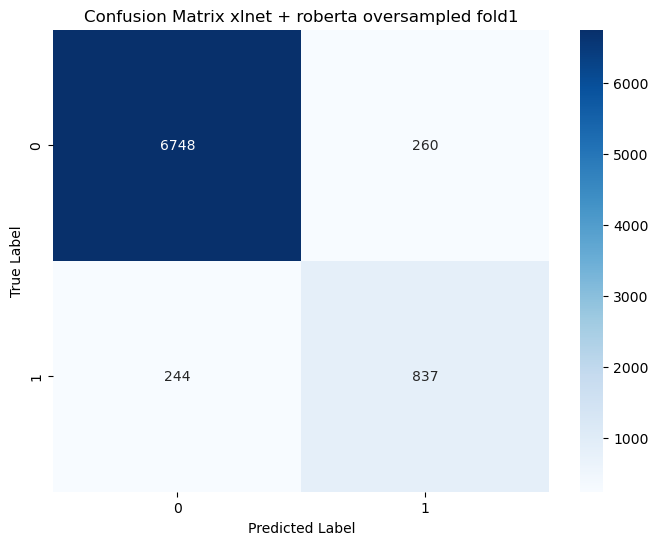

In [3]:
import numpy as np
import pandas as pd

columns = ['model', 'accuracy', 'f1', 'precision', 'recall', 'fold', 'total']
metric_df = pd.DataFrame(columns=columns)
sentence_model = 'xlnet'
hierarchical_model = 'roberta'
model_name = 'xlnet + roberta oversampled'
fold = 1

sentence_data_train = np.load('model_oversampled_'+ sentence_model +'/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_embeddings_train.npy')
hierarchical_data_train = np.load('model_oversampled_'+ hierarchical_model +'_h/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_embeddings_train.npy')
combined_data_train = np.concatenate([hierarchical_data_train, sentence_data_train], axis=-1)

labels_train = np.load('model_oversampled_'+ sentence_model +'/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_labels_train.npy')

sentence_data_test = np.load('model_oversampled_'+ sentence_model +'/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_embeddings_test.npy')
hierarchical_data_test = np.load('model_oversampled_'+ hierarchical_model +'_h/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_embeddings_test.npy')
combined_data_test = np.concatenate([hierarchical_data_test, sentence_data_test], axis=-1)

labels_test = np.load('model_oversampled_'+ sentence_model +'/pretrained_oversampled_dataset_fold/fold' + str(fold) + '_labels_test.npy')

accuracy, f1, precision, recall = xg_boost_train(combined_data_train, labels_train, combined_data_test, labels_test, model_name, fold)

metric_df.loc[len(metric_df)] = [model_name, accuracy, f1, precision, recall, fold, len(labels_test)]